# Quantitative comparisons and statistical visualizations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

## Quantitative comparisons: bar-charts

In [130]:
aapl_sales = pd.read_csv('data/apple_sales_breakdown.csv', header = 0, index_col = 0)

In [131]:
aapl_sales['Total'] = aapl_sales.sum(axis = 1).round(2)

In [132]:
aapl_sales

,iPhone,Mac,iPad,Wearables & Accessories,Services,Total
Quarter,,,,,,
Q1,65.78,7.74,9.40,13.48,20.77,117.17
Q2,51.33,7.17,6.67,8.76,20.91,94.84
Q3,40.67,7.38,7.22,8.08,19.60,82.95
Q4,43.81,7.61,6.44,9.32,22.31,89.49


In [133]:
aapl_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Q1 to Q4
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iPhone                   4 non-null      float64
 1   Mac                      4 non-null      float64
 2   iPad                     4 non-null      float64
 3   Wearables & Accessories  4 non-null      float64
 4   Services                 4 non-null      float64
 5   Total                    4 non-null      float64
dtypes: float64(6)
memory usage: 224.0+ bytes


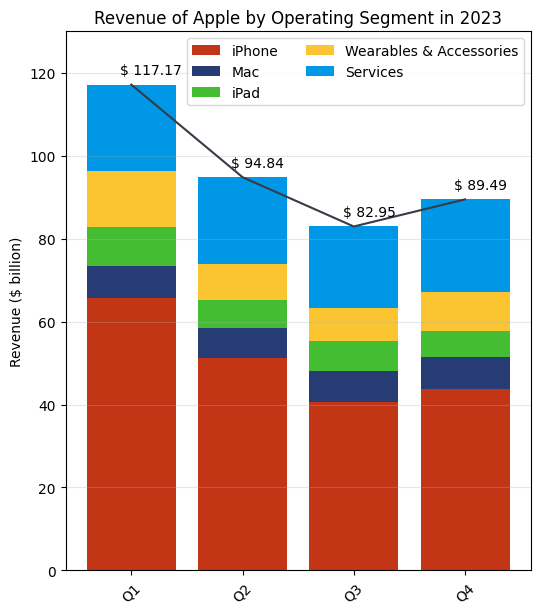

In [159]:
fig, ax = plt.subplots(figsize = (6,7))

# set y axis limit
ax.set_ylim(0, 130)

# plot stacked bar chart
ax.bar(aapl_sales.index, aapl_sales['iPhone'], label = 'iPhone', color='#c23616')

ax.bar(aapl_sales.index, aapl_sales['Mac'], bottom = aapl_sales['iPhone'], label = 'Mac', color = '#273c75')

ax.bar(aapl_sales.index, aapl_sales['iPad'], bottom = aapl_sales['iPhone'] + aapl_sales['Mac'], label = 'iPad', color= '#44bd32')

ax.bar(aapl_sales.index, aapl_sales['Wearables & Accessories'], bottom = aapl_sales['iPhone'] + aapl_sales['Mac'] + aapl_sales['iPad'], label = 'Wearables & Accessories', color='#fbc531')

ax.bar(aapl_sales.index, aapl_sales['Services'], bottom = aapl_sales['iPhone'] + aapl_sales['Mac'] + aapl_sales['iPad'] + aapl_sales['Wearables & Accessories'], label = 'Services', color='#0097e6')

# add labels
ax.tick_params(axis='x', labelrotation = 45)
ax.set_ylabel('Revenue ($ billion)')
# add title
ax.set_title("Revenue of Apple by Operating Segment in 2023")

# add legend
ax.legend(ncols = 2)

# add grid
ax.grid(axis='y', alpha = 0.3)

# plot total revenue
ax.plot(aapl_sales.index, aapl_sales['Total'], color = '#353b48')

# loop the total revenue and annotate
for i in range(len(aapl_sales['Total'])):
    ax.annotate(f"$ {aapl_sales['Total'][i]}", 
            xy = (aapl_sales.index[i] , aapl_sales['Total'][i]),
            xytext = (i - 0.1, aapl_sales['Total'][i] + 2.5),
           )

## Quantitative comparisons: histograms

In [161]:
import yfinance as yf

In [195]:
ticker = yf.Tickers(['^GSPC','^IXIC'])

In [196]:
vol_data = ticker.history(start="2023-01-01", end="2023-12-31")['Volume']

[*********************100%***********************]  2 of 2 completed


In [197]:
vol_data.rename(columns={"^GSPC": "S&P 500", "^IXIC": "NASDAQ"}, inplace = True)

In [198]:
vol_data.head()

,S&P 500,NASDAQ
Date,,
2023-01-03,3959140000,4780650000
2023-01-04,4414080000,5085380000
2023-01-05,3893450000,4764270000
2023-01-06,3923560000,5199780000
2023-01-09,4311770000,5132190000


Text(0.5, 1.0, 'Trading Volume Distribution of S&P 500 and NASDAQ in 2023')

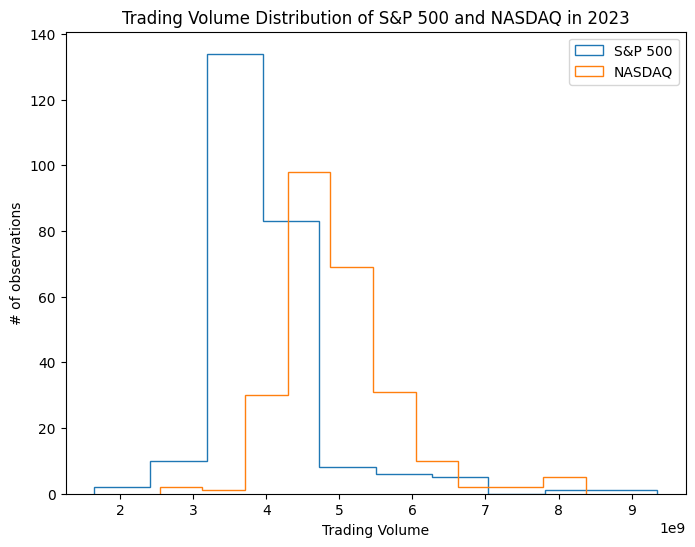

In [204]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(vol_data['S&P 500'], label = 'S&P 500', histtype = 'step')

ax.hist(vol_data['NASDAQ'], label = 'NASDAQ', histtype = 'step')

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Trading Volume")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

# add legend
ax.legend()

# add title
ax.set_title('Trading Volume Distribution of S&P 500 and NASDAQ in 2023')

## Statistical plotting

In [214]:
import numpy as np

### Error bars in Bar Chart

Text(0.5, 1.0, 'Bar plot of the Average Trading Volume of S&P 500 and NASDAQ')

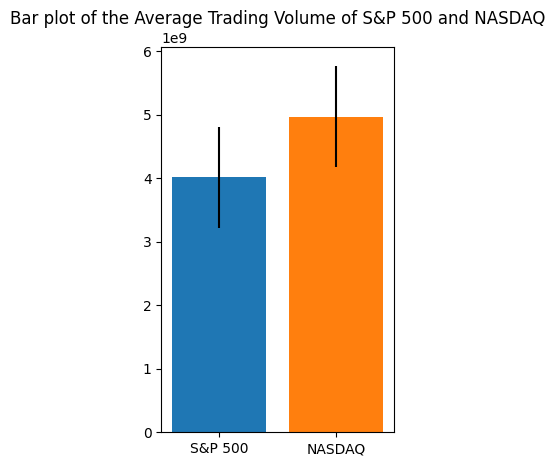

In [227]:
fig, ax = plt.subplots(figsize = (3,5))

ax.bar('S&P 500',
       vol_data['S&P 500'].mean(),
       yerr = vol_data['S&P 500'].std()
      )

ax.bar('NASDAQ',
       vol_data['NASDAQ'].mean(),
       yerr = vol_data['NASDAQ'].std()
      )

ax.set_title('Average Trading Volume of S&P 500 and NASDAQ')

### Adding error bars to plots

In [229]:
m_data = vol_data.groupby(by=[vol_data.index.month, vol_data.index.year]).agg([np.mean, np.std])

In [243]:
m_data.index.get_level_values(0)

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Date')

([<matplotlib.axis.XTick at 0x130c26110>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

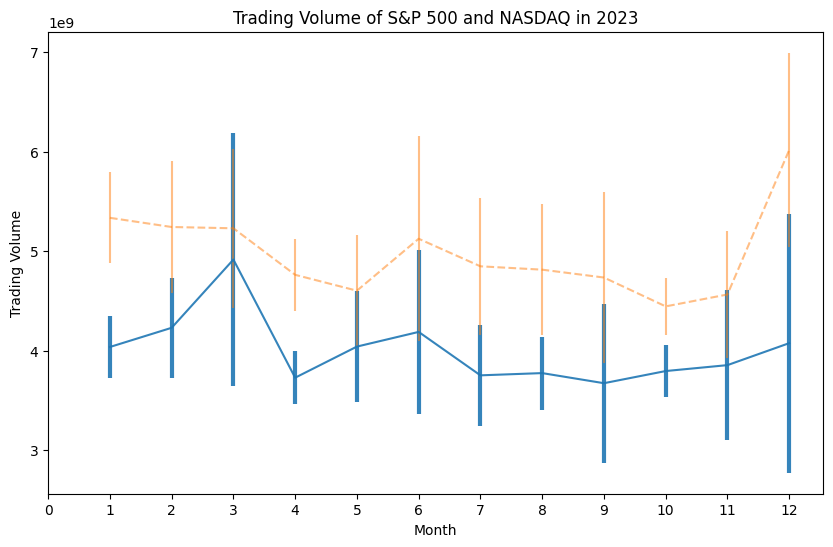

In [276]:
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(m_data.index.get_level_values(0), 
            m_data['S&P 500']['mean'],
            yerr = m_data['S&P 500']['std'],
            alpha = 0.9,
            elinewidth = 3
           )

ax.errorbar(m_data.index.get_level_values(0), 
            m_data['NASDAQ']['mean'],
            yerr = m_data['NASDAQ']['std'],
            alpha = 0.5,
            linestyle='--'
           )

ax.set_xlabel('Month')
ax.set_ylabel('Trading Volume')

ax.set_title('Trading Volume of S&P 500 and NASDAQ in 2023')

plt.xticks(np.arange(0, 13, 1))

### Boxplots

Text(0.5, 1.0, 'Trading Volume of S&P 500 and NASDAQ in 2023')

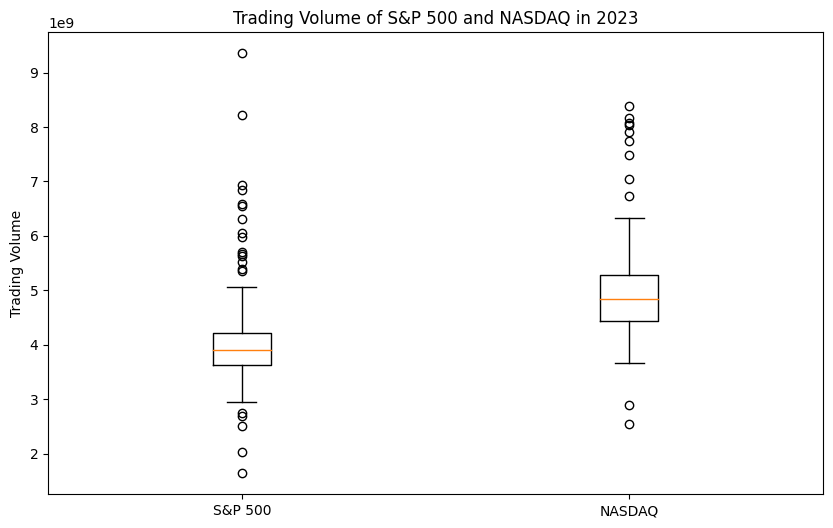

In [282]:
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot([vol_data['S&P 500'], vol_data['NASDAQ']])
ax.set_xticklabels(['S&P 500','NASDAQ'])
ax.set_ylabel('Trading Volume')
ax.set_title('Trading Volume of S&P 500 and NASDAQ in 2023')

In [284]:
np.max(vol_data['S&P 500'])

9354280000

In [286]:
vol_data['S&P 500'].idxmax()

Timestamp('2023-03-17 00:00:00')

### Quantitative comparisons: scatter plots

In [298]:
# get S&P 500 list

# sp_assets = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
# tickers_list = sp_assets['Symbol'].str.replace('.', '-').tolist()

In [311]:
data_1 = np.random.normal(10,2,(2,200))
data_2 = np.random.normal(12,5,(2,200))

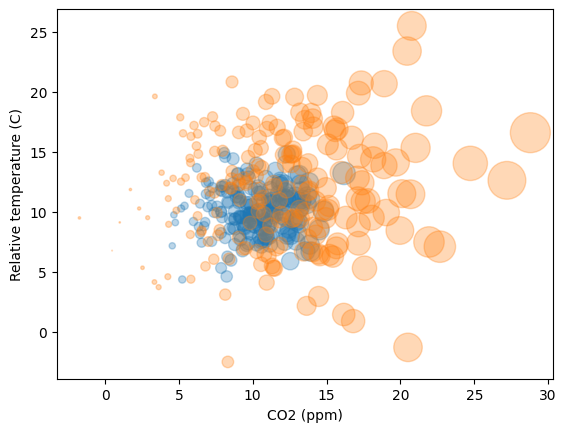

In [321]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(data_1[0], data_1[1], alpha = 0.3, s =data_1[0] ** 2)

ax.scatter(data_2[0], data_2[1], alpha = 0.3, s =data_2[0] ** 2)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()